# 1. c) Reading inputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
filepath = "input.csv"

df = pd.read_csv(filepath, index_col = 0)
df = df.dropna(thresh=8) # drop rows with NaN values in any column 
df = df.sample(frac=1) # shuffle the rows
df.head()

,Regressor,Var1,Var2,Var3,Var4,Var5,Var6,Var7
Sl.No,,,,,,,,
152,32.0,4,83.0,61.0,2003,19.0,74,3
279,23.8,4,151.0,85.0,2855,17.6,78,1
328,32.2,4,108.0,75.0,2265,15.2,80,3
383,36.0,4,105.0,74.0,1980,15.3,82,2
256,19.9,8,260.0,110.0,3365,15.5,78,1


In [4]:
# assuming Y is always the column next to index

Y = df.iloc[:,0].copy().values
X = df.iloc[:,1:].copy().values

no_x = X.shape[1] # no of independent variables

limit = 70*df.shape[0]//100 # for selecting 70% of data

Y_train = np.array(Y[:limit])
Y_test = np.array(Y[limit:])

X = np.transpose(X)
X = np.array([(i - np.mean(i))/(np.max(i)-np.min(i)) for i in X]) # normalising

X = np.transpose(X)
X_train = np.transpose(X[:limit])
X_test = np.transpose(X[limit:])

In [5]:
learning_rate = 1
error = []
W = np.zeros(no_x)

for _ in range(1000):
    Y_ = np.matmul(W, X_train)
    mse = np.mean((Y_train - Y_)**2)
    error.append(mse) # for plotting
    ct = 2*(Y_train - Y_) # common term in derivative
    dL_dw = np.array([ np.mean(ct*x_js) for x_js in X_train]) 
    W =  W + learning_rate*dL_dw

print("train_error : "+str(mse))
print("weights : "+str(W))

train_error : 557.290353621
weights : [  3.92331863  -7.8760789  -13.72747768  -4.79759385 -16.37957457
  12.34614932   6.67171051]


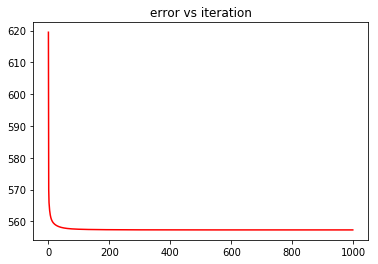

In [6]:
plt.plot(range(len(error[:])),error[:], color="red")
plt.title("error vs iteration")
plt.show()

In [7]:
Y_ = np.matmul(W, X_test)
test_error = np.mean((Y_test - Y_)**2)
print("test_error : "+str(test_error))

test_error : 592.65360784
